# Evaluation Project 1 - Baseball Case Study

**Problem Statement**

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors


-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


For downloading the dataset, use the link given below. 

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [4]:
df.shape

(30, 17)

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

**Input features:**

* **Runs (R)** - scored: times reached home plate legally and safely

* **At Bats (AB)** - At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

* **Hits (H)** - reaching base because of a batted, fair ball without error by the defense

* **Doubles (2B)** - Double: hits on which the batter reaches second base safely without the contribution of a fielding error

* **Triples (3B)** -  Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

* **Homeruns (HR)** - Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

* **Walks (BB)** - average number of walks allowed by the pitcher per inning

* **Strikeouts (SO)** - number of batters who received strike three

* **Stolen Bases (SB)** - number of bases advanced by the runner while the ball is in the possession of the defense

* **Runs Allowed (RA)** - the amount of runs that score against a pitcher

* **Earned Runs (ER)** -  number of runs that did not occur as a result of errors or passed balls

* **Earned Run Average (ERA)** - total number of earned runs(ER), multiplied by 9, divided by innings pitched

* **Shutouts (SHO)** - number of complete games pitched with no runs allowed

* **Saves (SV)** - number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

* **Complete Games (CG)** - number of games where player was the only pitcher for their team

* **Errors (E)** - number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

**Output: Number of predicted wins (W)**

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000



* Count of all the columns is equal to 30 which is equal to total number of  rows in the dataset which means there is no null or missing values in the dataset

* Mean and standard deviation values of all the columns looks good to proceed

* Min, quantiles and max values of all columns looks good, seems proper data distribution but lets go ahead and check the distribution graphically

In [7]:
# Checking null values 

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**No missing values in the dataset**

In [8]:
# Checking datatypes of the column

df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

* **All the columns are continuous in nature**

* **The given dataset falls into regression analysis**

# Univariate Analysis

In [9]:
# Importing required libraries

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter

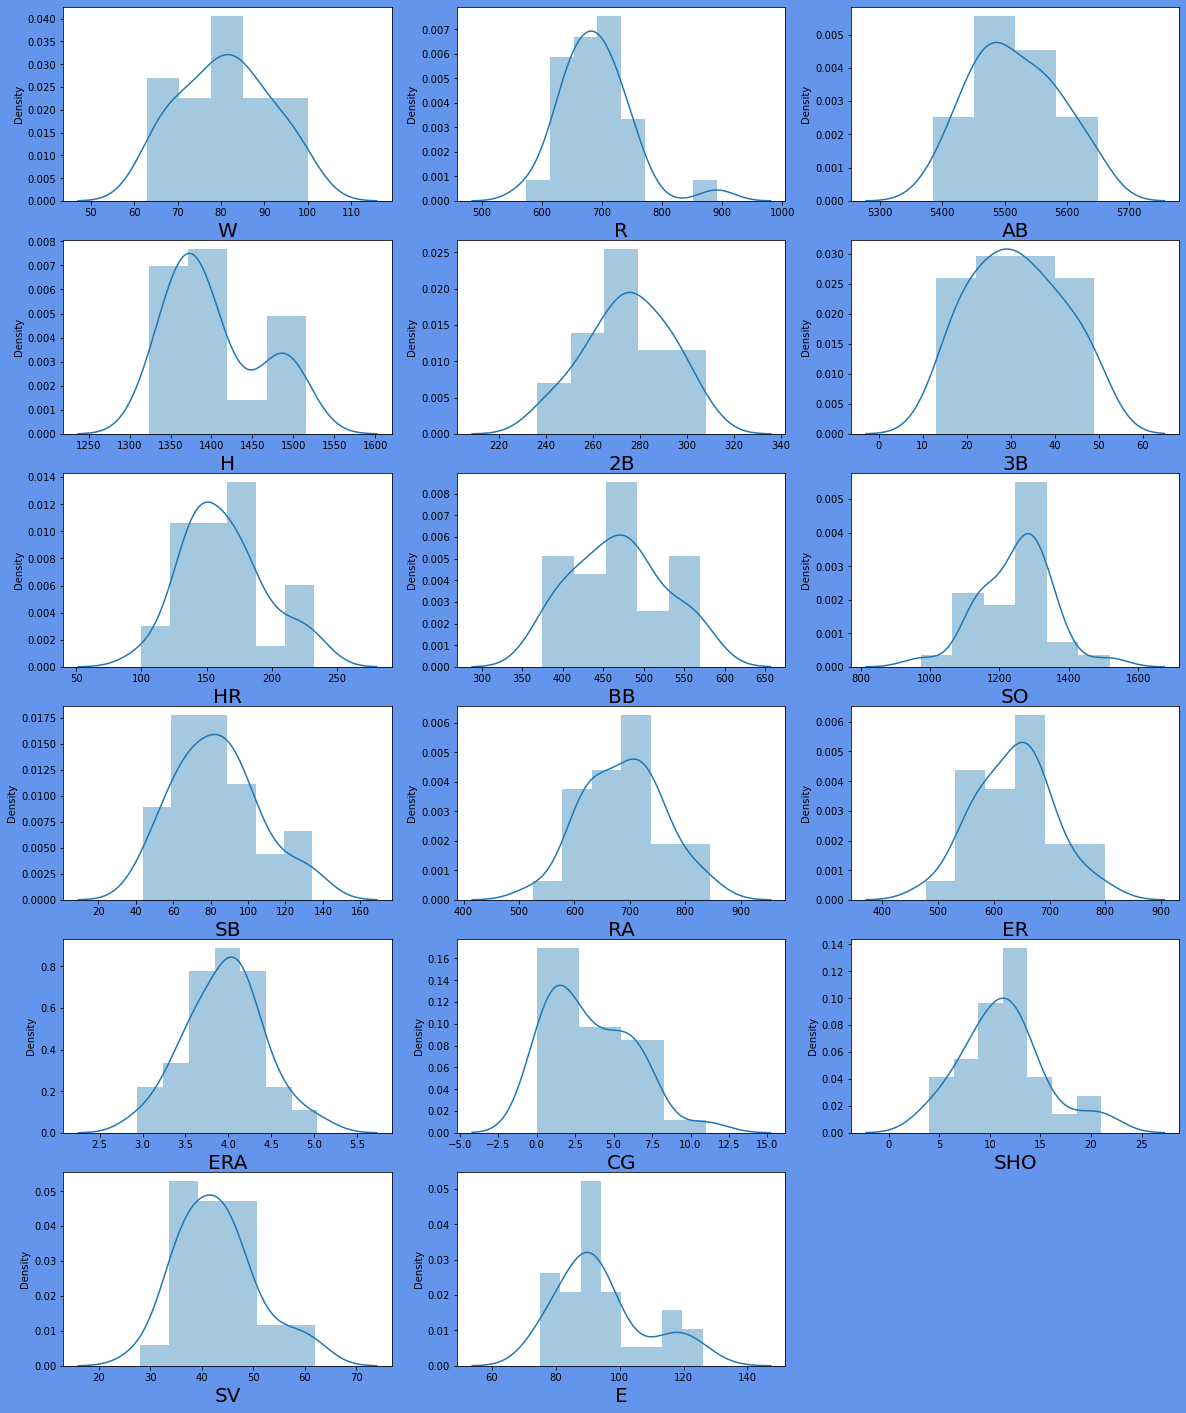

In [10]:
# Lets see how data is distributed for each column. Machine learnong model is built on the assumption that data is
#distributed normally.

plt.figure(figsize=(20,25),facecolor='cornflowerblue')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**The data distribution looks decent enough but some of the features are either right or left skewed. Lets see the skewness present in the dataset**

In [11]:
# Checking skewness

df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

* **The optimal range of skewness is -0.5 to +0.5**
* **The number of runs, hits, home runs,Complete Games, Saves, Shutouts, and Errors are positively skewed**


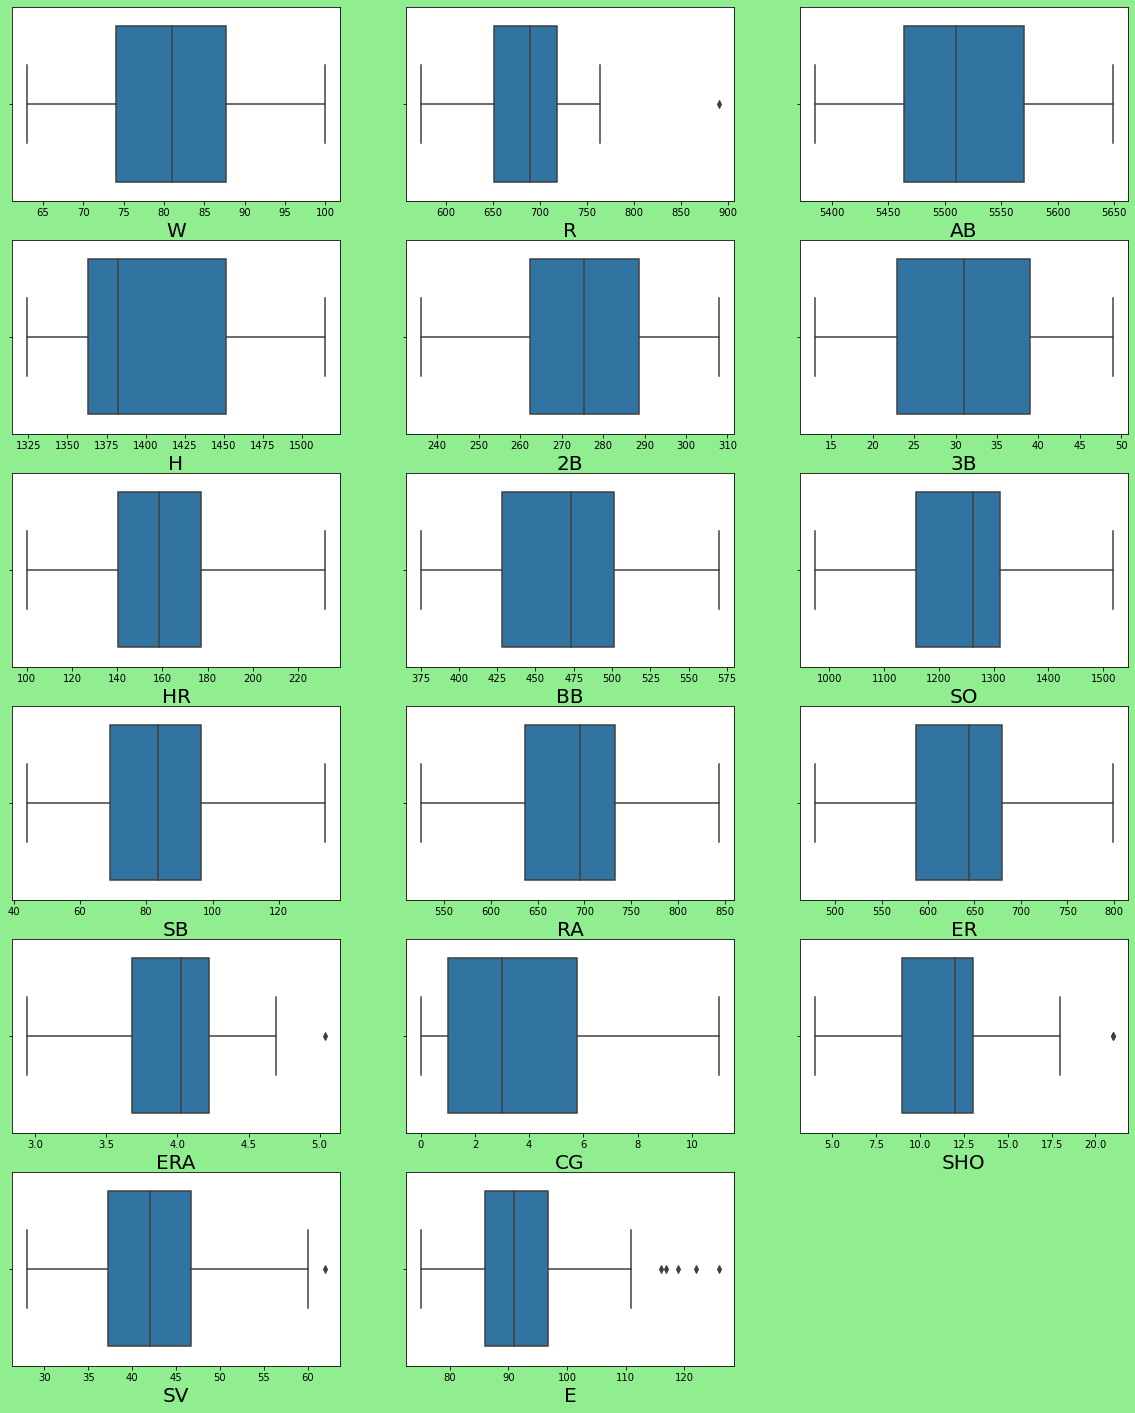

In [12]:
# Checking Outliers using Boxplot

plt.figure(figsize=(20,25),facecolor='lightgreen')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* **Some Outliers are present in the given dataset**

* **Outliers in Errors are totally possible so no need to worry about it**

* **Runs scored, ERA , SHO and SV has one outliers but as Run is one of the most important parameter, it will be wise to manage it using some transforming methods**

# Bivariate Analysis

Text(0, 0.5, 'Hits')

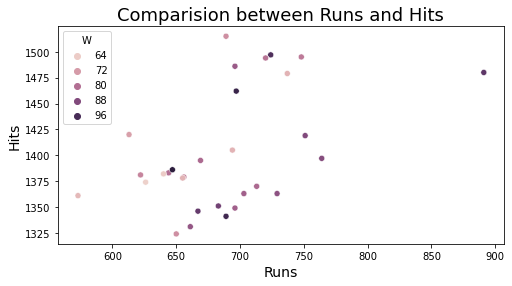

In [13]:
# Comparision between runs and Hits

plt.figure(figsize=(8,4))
sns.scatterplot(df['R'],df['H'],hue=df['W'])
plt.title("Comparision between Runs and Hits",fontsize=18)
plt.xlabel('Runs',fontsize=14)
plt.ylabel('Hits',fontsize=14)

* **No wins when runs scored is less than 650 and number of hits is less than 1325**

* **Many number of wins when hits are less than 1375 and runs scored is in range 650-750**

Text(0, 0.5, 'At Bats')

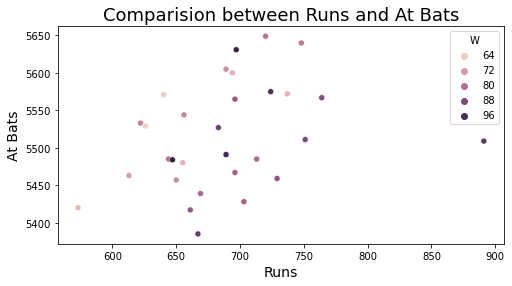

In [14]:
# Comparison between Runs and At Bats

plt.figure(figsize=(8,4))
sns.scatterplot(df['R'],df['AB'],hue=df['W'])
plt.title("Comparision between Runs and At Bats",fontsize=18)
plt.xlabel('Runs',fontsize=14)
plt.ylabel('At Bats',fontsize=14)

* **Runs and At Bats shows positive linear relationship which means more runs scored will lead to more At Bats**

Text(0, 0.5, 'Home Runs')

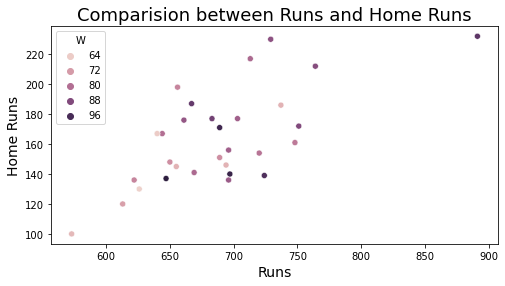

In [15]:
# Comparison between Runs and Home Runs

plt.figure(figsize=(8,4))
sns.scatterplot(df['R'],df['HR'],hue=df['W'])
plt.title("Comparision between Runs and Home Runs",fontsize=18)
plt.xlabel('Runs',fontsize=14)
plt.ylabel('Home Runs',fontsize=14)

* **As we know Home runs are hits on which the batter successfully touched all four bases, without the contribution of a fielding error**

* **More wins are in range when Home runs is between 140 to 180 and runs scored is between 600 to 750**

# Multivariate analysis

<AxesSubplot:>

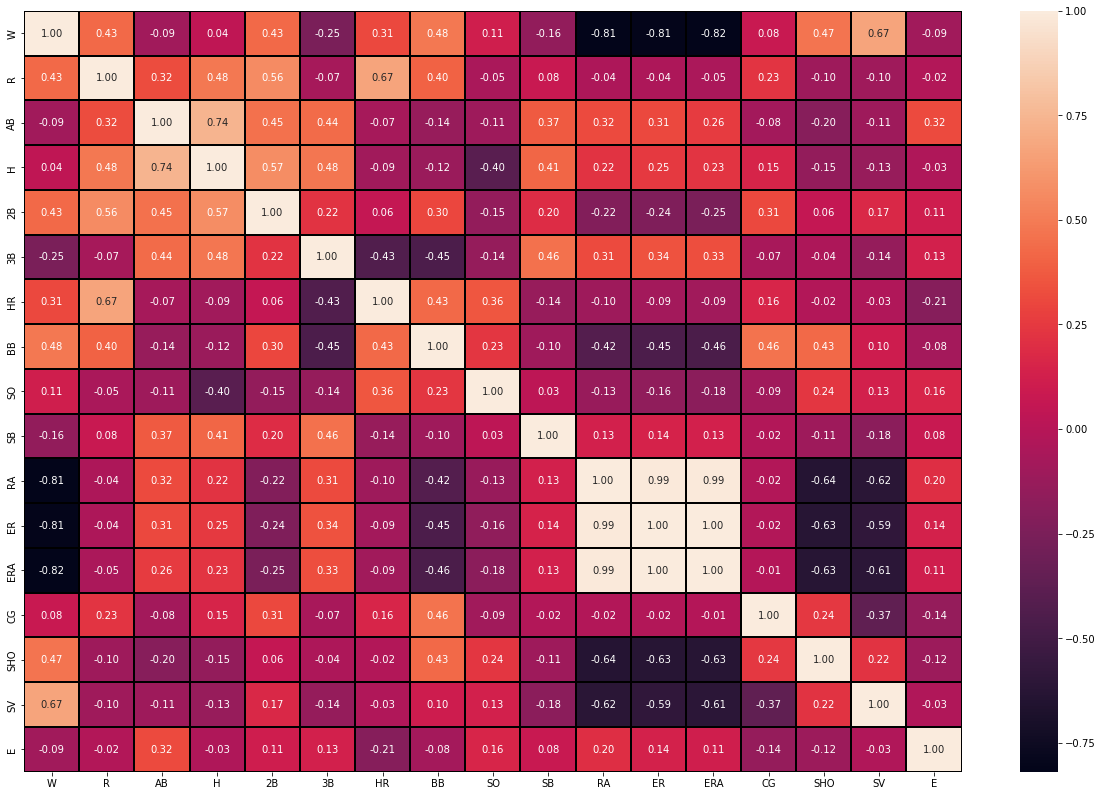

In [16]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(21,14))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")


* **RA,ER and ERA are highly negatively correlated with number of wins**

* **No high correlation between the input features exist which means there is no multicollinarity exist in the dataset**

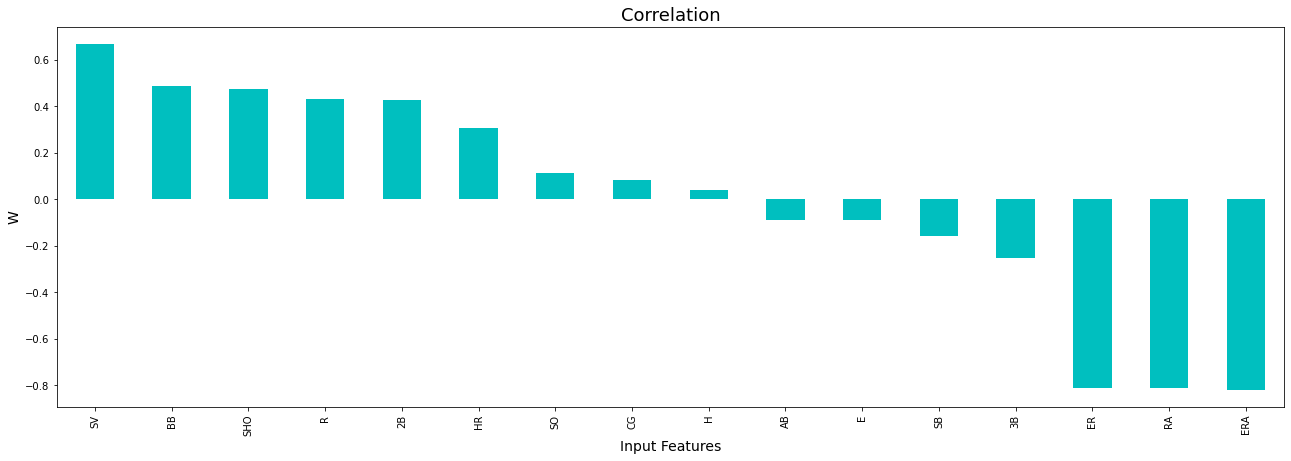

In [17]:
# Checking the features correlation with the target variable

plt.figure(figsize = (22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind ='bar',color='c')
plt.xlabel('Input Features',fontsize = 14)
plt.ylabel('W', fontsize =14)
plt.title('Correlation',fontsize=18)
plt.show()

**Out of 16 features, 5 features i.e SO,CG,H,AB and E are showing less correlation with the target variable**


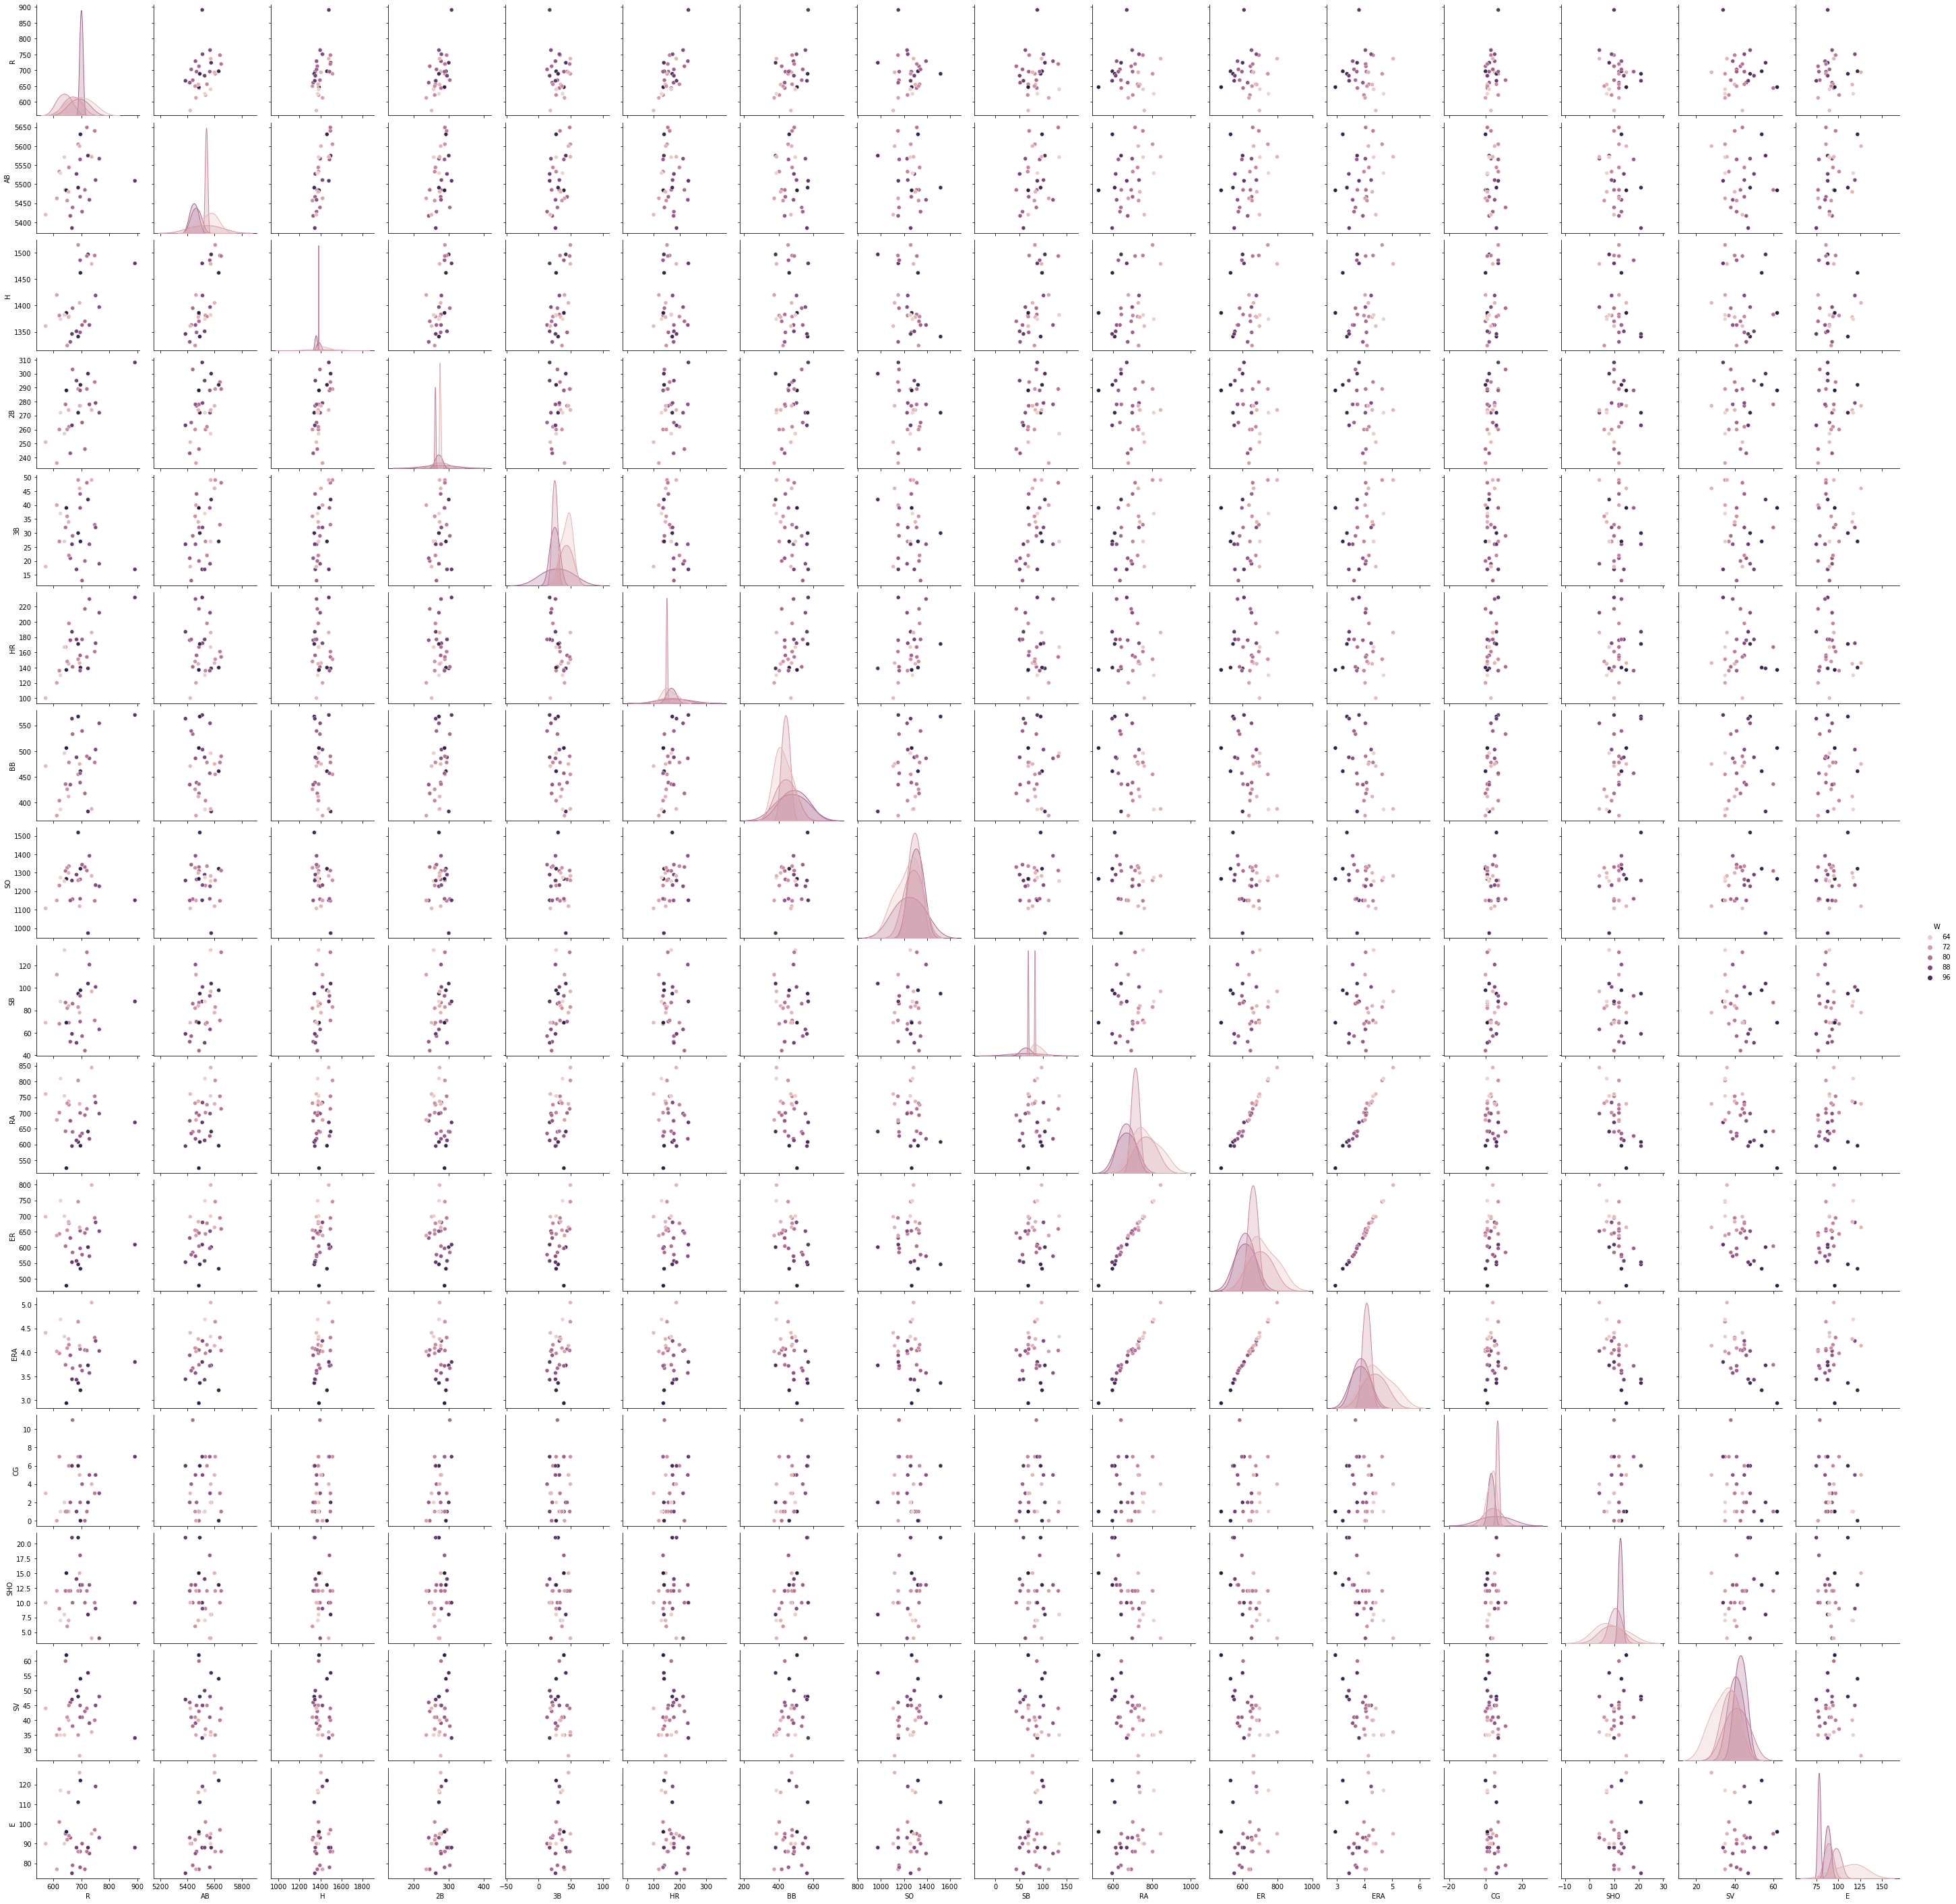

In [18]:
# Plotting pairplot

sns.pairplot(df, hue="W")

In [19]:
# Seperating input features (X) and target variable (y)
X = df.drop('W',axis =1)
y = df.W

# PowerTransformation

In [20]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [21]:
X_new_pt = pt.fit_transform(X)

In [22]:
# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

In [23]:
# Checking Skewness

X.skew().sort_values(ascending=False)

AB     0.090410
E      0.063909
SO     0.041170
SHO    0.006560
ERA    0.001746
SV     0.000836
H      0.000000
HR    -0.000065
ER    -0.001940
BB    -0.007760
RA    -0.008082
SB    -0.010455
2B    -0.035315
R     -0.055006
CG    -0.059785
3B    -0.072933
dtype: float64

**Skewness ranges from -0.07 to 0.09 in the given dataset after Power transformation**

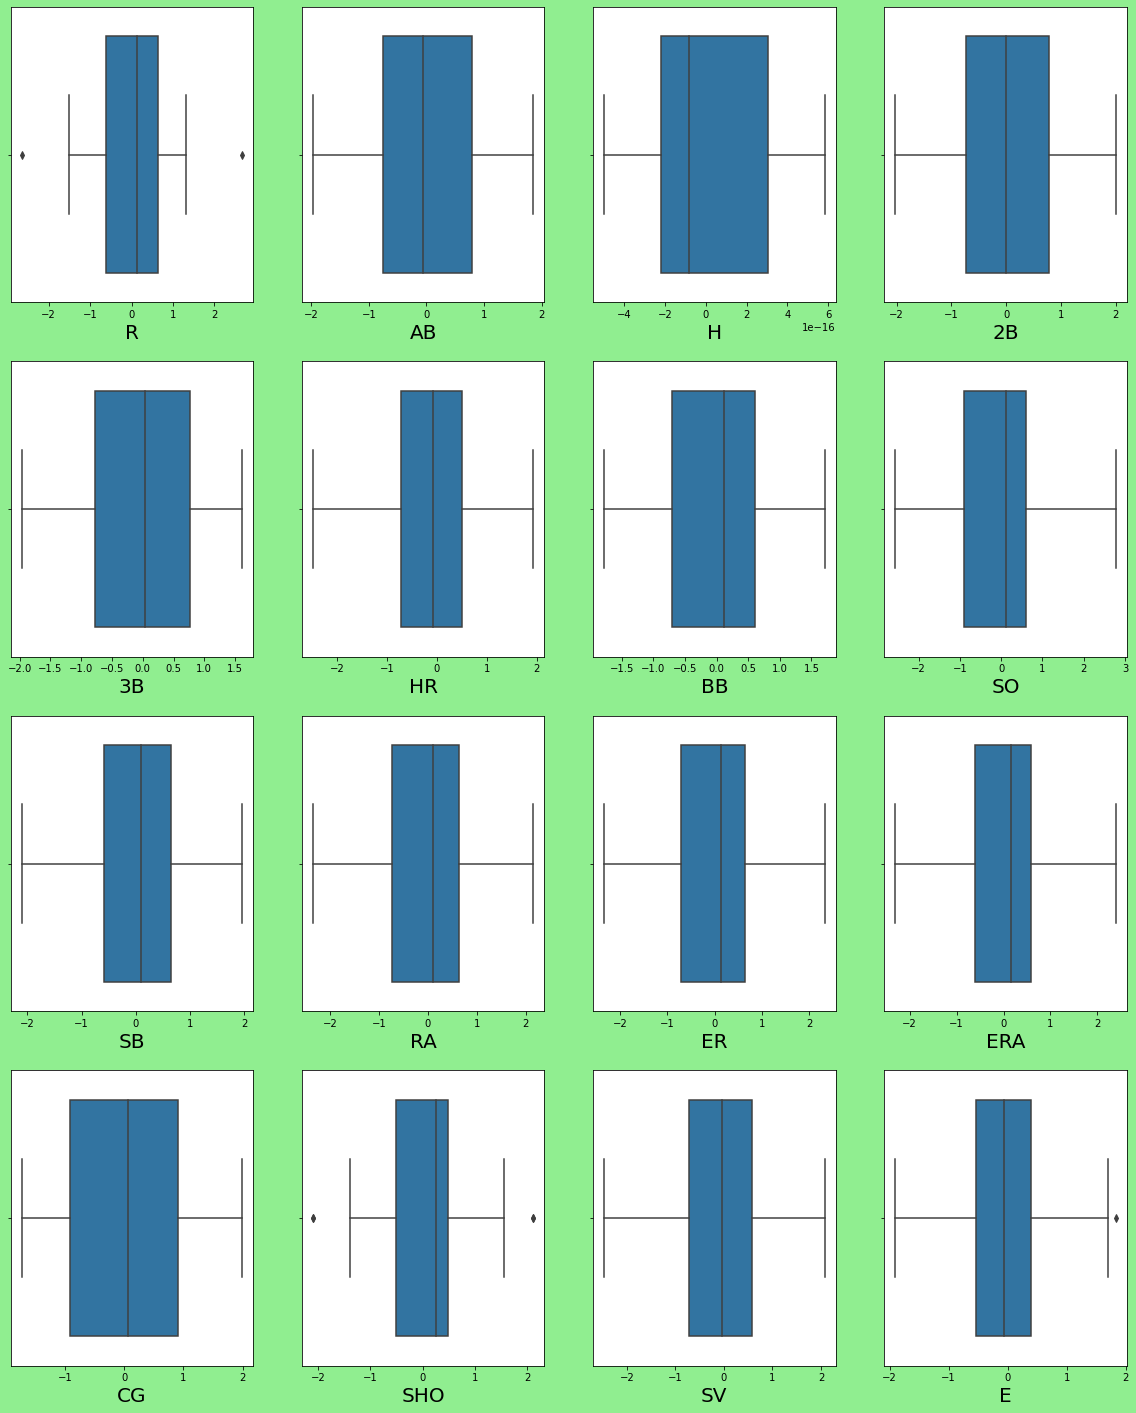

In [24]:
# Checking Outliers after Power Transformation

plt.figure(figsize=(20,25),facecolor='lightgreen')
plotnumber=1

for column in X:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**The Powertransform seems to do a good job in reducing the skewness and outliers of the different distributions of features. However, it does not lead to the normalization of the feature distributions.**

**Some outliers are still present but as the data is too small, we will keep them and proceed**

# Principal component Analysis (PCA)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

pca = PCA()

In [26]:
X_scaled = scaler.fit_transform(X)

pca.fit_transform(X_scaled)

array([[ 8.88929398e-01,  2.09323679e+00,  2.87145625e+00,
         4.75100309e-01, -2.42455296e+00, -1.52343111e-01,
         7.27400527e-01, -7.04459711e-01,  3.99539904e-01,
        -8.29025237e-01,  3.29781571e-01,  2.76429401e-02,
         3.81192822e-01, -2.66165614e-01,  5.15546881e-02,
        -1.76141816e-02],
       [ 2.58973451e-02, -7.68249603e-01,  2.67084479e-01,
         4.86820146e-02, -1.17339464e-01,  6.89154781e-01,
        -6.15521824e-01, -1.32513773e+00,  4.89022088e-01,
         3.16793045e-01, -7.06962322e-01,  2.69381534e-02,
         2.73316959e-01, -4.14295258e-01, -3.35096535e-02,
         3.77075172e-02],
       [-1.21995375e+00,  1.09297543e+00, -2.27477640e-01,
         2.73886650e+00,  1.03678025e-01, -5.70349776e-01,
         1.30696556e+00, -8.79730297e-01, -1.43070660e-03,
         1.05839706e+00,  2.89289524e-01,  3.31354614e-01,
        -5.04414949e-02,  6.57676024e-02, -7.52260639e-03,
         1.91787487e-03],
       [ 8.73886510e-01, -1.42406132e

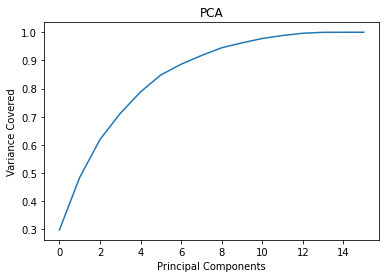

In [27]:
# Lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**Around 10 components are able to explain >95% variance. Its safe to consider 10 PC's**

In [28]:
pca = PCA(n_components=10)
new_pcomp = pca.fit_transform(X_scaled)
princ_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
princ_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.888929,2.093237,2.871456,0.475100,-2.424553,-0.152343,0.727401,-0.704460,0.399540,-0.829025
1,0.025897,-0.768250,0.267084,0.048682,-0.117339,0.689155,-0.615522,-1.325138,0.489022,0.316793
2,-1.219954,1.092975,-0.227478,2.738866,0.103678,-0.570350,1.306966,-0.879730,-0.001431,1.058397
3,0.873887,-1.424061,0.128261,0.676599,0.476123,-1.188661,-0.274776,0.149977,0.289352,-0.268590
4,3.255761,1.594685,-0.351287,1.161294,0.752772,0.447190,-1.390524,-0.553840,-0.873796,0.419899
5,-0.783906,3.720475,-2.711949,0.900972,-1.012493,-0.294885,0.938383,0.700016,0.809108,0.317054
6,-0.178164,0.766095,-2.334024,-1.276392,-1.777286,-0.729225,0.659732,0.145409,-0.704984,-0.274698
7,-0.798657,-2.022148,-1.622999,-1.054935,-2.144350,1.773799,-1.353953,0.601596,0.131416,0.306015
8,-1.233213,-0.626849,1.359740,-1.271525,-0.219256,0.312342,0.228378,-0.784496,-0.483988,-0.365242
9,2.005508,2.098594,-0.318330,-0.026822,-0.952149,-0.861366,-0.987847,0.388784,-0.385678,0.128378


# Best Random State

In [49]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle
from sklearn import metrics

In [30]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(princ_comp,y,test_size=0.2,random_state=i)
    
    lr = LinearRegression()
    
    lr.fit(X_train,y_train)
    
    pred_lr = lr.predict(X_test)
   
    score_lr = r2_score(y_test,pred_lr)
    
    print("R2 Score: ",score_lr,"at random state", i)
   
    
    if score_lr>maxR2score:
   
        maxR2score = score_lr
              
        maxRS = i
        
        print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

R2 Score:  0.6812343815394015 at random state 1
Maximum R2 Score: 0.6812343815394015 at random state  1
R2 Score:  0.3900195611494568 at random state 2
R2 Score:  0.6902498648546953 at random state 3
Maximum R2 Score: 0.6902498648546953 at random state  3
R2 Score:  0.9338229446745392 at random state 4
Maximum R2 Score: 0.9338229446745392 at random state  4
R2 Score:  0.8081936927988753 at random state 5
R2 Score:  0.8139068879899255 at random state 6
R2 Score:  0.38418809964293577 at random state 7
R2 Score:  0.8380827575715941 at random state 8
R2 Score:  0.7260819142728054 at random state 9
R2 Score:  0.7846956243464631 at random state 10
R2 Score:  0.4109910526034546 at random state 11
R2 Score:  -0.36274949931157185 at random state 12
R2 Score:  0.5878546681217458 at random state 13
R2 Score:  0.9165615885437894 at random state 14
R2 Score:  0.597066156130649 at random state 15
R2 Score:  0.6034881451558749 at random state 16
R2 Score:  0.858327617159347 at random state 17
R2 Scor

In [31]:
#print("Best accuracy is ",maxAccu*100, "on random state", maxRS)
print("Best accuracy is ",maxR2score*100, "on random state", maxRS)

Best accuracy is  95.78536763588264 on random state 73


**So the best random state comes out as 73 for which max R2 score is 95.78%**

# Linear Regression Model

In [32]:
lr = LinearRegression()

X_train,X_test,y_train,y_test = train_test_split(princ_comp,y,test_size=0.2,random_state=73)

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("Training accuracy:",score_train*100)

print("Testing accuracy:",score_test*100)

Training accuracy: 88.27062748769904
Testing accuracy: 95.78536763588264


# Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

Training_accuracy = r2_score(y_train,pred_train)
Testing_accuracy = r2_score(y_test,pred_test)


for j in range(2,10):
    cv_score = cross_val_score(lr,princ_comp,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j}, the cv score is {cv_mean} and accuracy score for training is {Training_accuracy} and accuracy for testing is {Testing_accuracy}")
    print("/n")

At cross fold 2, the cv score is -1.2132811682389806 and accuracy score for training is 0.8827062748769904 and accuracy for testing is 0.9578536763588263
/n
At cross fold 3, the cv score is 0.5048065994630425 and accuracy score for training is 0.8827062748769904 and accuracy for testing is 0.9578536763588263
/n
At cross fold 4, the cv score is 0.6929622687638934 and accuracy score for training is 0.8827062748769904 and accuracy for testing is 0.9578536763588263
/n
At cross fold 5, the cv score is 0.4217139822198793 and accuracy score for training is 0.8827062748769904 and accuracy for testing is 0.9578536763588263
/n
At cross fold 6, the cv score is 0.3815402539085703 and accuracy score for training is 0.8827062748769904 and accuracy for testing is 0.9578536763588263
/n
At cross fold 7, the cv score is 0.41233205953870067 and accuracy score for training is 0.8827062748769904 and accuracy for testing is 0.9578536763588263
/n
At cross fold 8, the cv score is 0.4980403853878361 and accura

Best cv score = 0.6929 at cv = 4, so we wil take cv = 4 for the cross validation of other models as well

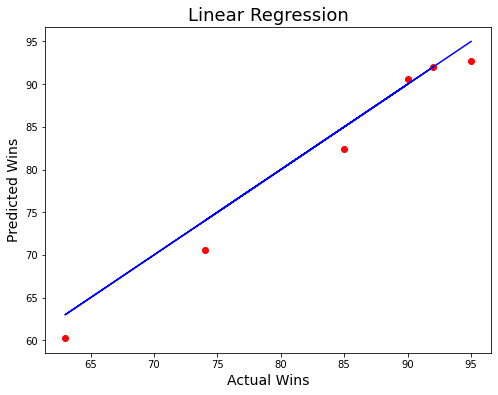

In [34]:
# Plotting Predicted vs Actual number of Wins
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color ='r')
plt.plot(y_test,y_test,color ='b')
plt.xlabel('Actual Wins',fontsize = 14)
plt.ylabel('Predicted Wins',fontsize =14)
plt.title('Linear Regression',fontsize = 18)
plt.show()

# Model Evaluation using RMSE

In [35]:
# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

Root mean squared Error: 2.3087527389038907


In [40]:
# All performance parameters for Linear regression model

print("=====LINEAR REGRESSION=====\n")

print('Root mean squared error:',rmse)

cv_score = cross_val_score(lr,princ_comp,y,cv=4)

cv_mean = np.mean(cv_score)

print('\nCV Score:',cv_mean)

print('\nR2 Score: ',score_test*100 )

=====LINEAR REGRESSION=====

Root mean squared error: 2.3087527389038907

CV Score: 0.6929622687638934

R2 Score:  95.78536763588264


# Lasso Regularization

In [43]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

#LassoCV will return best alpha after max iteration


lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)

lasscv.fit(X_train,y_train)

LassoCV(normalize=True)

In [45]:
#Best alpha parameter
alpha = lasscv.alpha_

lasso_reg =Lasso(alpha)

lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.2374559281214476)

In [46]:
pred_test = lasso_reg.predict(X_test)

print(lasso_reg.score(X_test,y_test)*100)

89.45615721035487


In [48]:
# All performance parameters for Lasso Regularization

print("=====LASSO REGULARIZATION=====\n")

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

cv_score = cross_val_score(lasso_reg,princ_comp,y,cv=4)

cv_mean = np.mean(cv_score)

print('\nCV Score:',cv_mean)

print('\nR2 Score: ',lasso_reg.score(X_test,y_test)*100)

=====LASSO REGULARIZATION=====

Root mean squared Error: 3.6517163476482875

CV Score: 0.7414854520185727

R2 Score:  89.45615721035487


# KNN Regressor

In [50]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====K Neighbors Regressor=====")

print("R square score for training dataset for K Neighbors regressor: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for K Neighbors Regressor: ", acc_test)

knn_score = cross_val_score(knn,princ_comp,y,cv=4)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor:",rmse)

=====K Neighbors Regressor=====
R square score for training dataset for K Neighbors regressor:  0.6740798988977041
R square score for test dataset for K Neighbors Regressor:  0.5077707006369425
Cross val score for K Neighbors Regresor: 48.67725014665341
Root mean squared Error for K Neighbors Regressor: 7.890078157618804


# Hyperparameter Tuning - K Neighbors Regressor

In [51]:
# Hyperparameter tuning for K Neighbors Regressor

params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'brute', 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}


In [52]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor after tuning: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor after tuning: ", acc_test)

knn_score = cross_val_score(knn,princ_comp,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor after tuning:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor after tuning:",rmse)

R square score for training dataset for K Neighbors regressor after tuning:  0.9999999999999993
R square score for test dataset for K Neighbors Regressor after tuning:  0.5776534145157068
Cross val score for K Neighbors Regresor after tuning: -33.70135992533038
Root mean squared Error for K Neighbors Regressor after tuning: 7.308564237534365


# Random Forest Regressor

In [53]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_train = rf.predict(X_train)

pred_test = rf.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====RANDOM FOREST REGRESSOR=====")

print("Training accuracy for Random Forest model:",score_train*100)

print("Testing accuracy for Random Forest model:",score_test*100)

cv_score = cross_val_score(rf,princ_comp,y,cv=4)

cv_mean = cv_score.mean()

print(f"At cross fold 4, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model:",rmse)


=====RANDOM FOREST REGRESSOR=====
Training accuracy for Random Forest model: 91.85443235273468
Testing accuracy for Random Forest model: 70.27891500109817
At cross fold 4, the cv score is 26.659772829854994 
Root mean squared Error for Random Forest model: 6.130980073908792


# Hyperparameter Tuning - Random Forest Regressor

In [54]:
# For Random Forest Regressor

params_rf = {'criterion':['mse','mae'],
             'min_samples_split':range(4,9),
             'max_features':['auto','sqrt','log2'],
             'max_samples':(0.1,0.2,0.25)}

grd_rf = GridSearchCV(rf,params_rf)

grd_rf.fit(X_train,y_train)

print(grd_rf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'max_samples': 0.25, 'min_samples_split': 4}


In [55]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("=====After tuning parameters of Random Forest=====")

print("R2 score for Random Forest Model after tuning:",rfs*100)

rf_score = cross_val_score(rf,princ_comp,y,cv=4)

rfc = rf_score.mean()

print("Cross val score for Random Forest model after tuning:",rfc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model after tuning:",rmse)

=====After tuning parameters of Random Forest=====
R2 score for Random Forest Model after tuning: 23.80775133977592
Cross val score for Random Forest model after tuning: -0.1209252247970638
Root mean squared Error for Random Forest model after tuning: 9.816416354335564


# Decision Tree Regressor

In [56]:
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)

dt.score(X_train,y_train)

pred_train = dt.predict(X_train)

pred_test = dt.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====DECISION TREE REGRESSOR=====")

print("Training accuracy for Decision Tree model:",score_train*100)

print("Testing accuracy for Decision Tree model:",score_test*100)

cv_score = cross_val_score(dt,princ_comp,y,cv=4)

cv_mean = cv_score.mean()

print(f"At cross fold 4, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Decision Tree Regressor model:",rmse)


=====DECISION TREE REGRESSOR=====
Training accuracy for Decision Tree model: 100.0
Testing accuracy for Decision Tree model: -112.95848890841205
At cross fold 4, the cv score is 9.279399492594257 
Root mean squared Error for Random Forest model: 16.41137816678823


# Hyperparameter Tuning - Decision Tree Regressor

In [58]:
dt_params = {'criterion': ["squared_error", "friedman_mse", "absolute_error"],
             'splitter': ['best','random'],
             'max_depth': range(9,14),
              'min_samples_leaf': range(1,7),
              'min_samples_split': range(2,7),
              'max_leaf_nodes': range(30,40),
             'random_state': range(46,86)
             }

grd_dt = GridSearchCV(estimator = dt, param_grid = dt_params,cv = 4, n_jobs =-1)

X_train,X_test,y_train,y_test = train_test_split(princ_comp,y,test_size=0.2,random_state=73)

grd_dt.fit(X_train,y_train)

print("Best parameters : ",grd_dt.best_params_)

Best parameters :  {'criterion': 'absolute_error', 'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 51, 'splitter': 'random'}


In [59]:
dt = grd_dt.best_estimator_

dt.fit(X_train,y_train)

dt.score(X_train,y_train)

pred_test = dt.predict(X_test)

dts = r2_score(y_test,pred_test)

print("=====After tuning parameters of Decision Tree Regressor=====")

print("R2 score for Decision Tree Regressor Model after tuning:",dts*100)

dt_score = cross_val_score(dt,princ_comp,y,cv=4)

dtc = dt_score.mean()

print("Cross val score for Decision Tree Regressor model after tuning:",dtc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Decision Tree Regressor model after tuning:",rmse)

=====After tuning parameters of Decision Tree Regressor=====
R2 score for Decision Tree Regressor Model after tuning: 42.806940478805174
Cross val score for Decision Tree Regressor model after tuning: -7.3438229491731395
Root mean squared Error for Decision Tree Regressor model after tuning: 8.504900548115382


# Ada Boost Regressor

In [60]:
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====ADA BOOST REGRESSOR=====")

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,princ_comp,y,cv=4)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)

=====ADA BOOST REGRESSOR=====
R square score for training dataset for Ada Boost regressor:  0.9772055194649387
R square score for test dataset for Ada Boost Regressor:  0.7143924844018189
Cross val score for Ada Boost Regresor: 17.501941053980165
Root mean squared Error for ada boost Regressor: 6.010109581452734


# Hyperparameter Tuning- Ada Boost Regressor

In [61]:
params_ada = {'n_estimators': [48,49,51,53,60],
              'learning_rate':[0.90,0.85,0.30,0.95,1.0],
              'loss' :['linear', 'square', 'exponential']
             }

grd_ada = GridSearchCV(ada,params_ada)

grd_ada.fit(X_train,y_train)

print(grd_ada.best_params_)

{'learning_rate': 0.9, 'loss': 'exponential', 'n_estimators': 60}


In [62]:
ada = grd_ada.best_estimator_

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for Ada Boost regressor after tuning: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor after tuning: ", acc_test)

ada_score = cross_val_score(ada,princ_comp,y,cv=4)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresora after tuning:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor after tuning:",rmse)

R square score for training dataset for Ada Boost regressor after tuning:  0.9785399097426096
R square score for test dataset for Ada Boost Regressor after tuning:  0.699763729246488
Cross val score for Ada Boost Regresora after tuning: 19.496164546743625
Root mean squared Error for ada boost Regressor after tuning: 6.162105837610179


# Support Vector Regressor (SVR)

In [63]:
svr = SVR()

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR: ", acc_test)

svr_score = cross_val_score(svr,princ_comp,y,cv=4)

svr_m = svr_score.mean()

print("Cross val score for SVR:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR:",rmse)

R square score for training dataset for SVR:  0.22811113387266468
R square score for test dataset for SVR:  0.11302104353425779
Cross val score for SVR: -9.13041559686022
Root mean squared Error for SVR: 10.591421041983464


# Hyperparameter Tuning - SVR

In [64]:
# Hyperparameter tuning for Support Vector Regressor

params_svr = {'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma':['scale','auto'],
              'epsilon':[0.1,0.01]
             }

grd_svr = GridSearchCV(svr,params_svr)

grd_svr.fit(X_train,y_train)

print(grd_svr.best_params_)

{'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [65]:
svr = grd_svr.best_estimator_

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR after tuning: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR after tuning: ", acc_test)

svr_score = cross_val_score(svr,princ_comp,y,cv=4)

svr_m = svr_score.mean()

print("Cross val score for SVR after tuning:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR after tuning:",rmse)

R square score for training dataset for SVR after tuning:  0.8444091964611484
R square score for test dataset for SVR after tuning:  0.9353623195940619
Cross val score for SVR after tuning: 73.35632702286851
Root mean squared Error for SVR after tuning: 2.8591731462485397


**Among all the models, Linear Regression model gives maximum R2 score as 95.78%,less root mean squared error as 2.3 and better cv score as 0.6929,so we will choose Linear regression model as our final model for the given dataset**

# Saving the model

In [66]:
filename = 'baseball_win.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [67]:
loaded_model = pickle.load(open('baseball_win.pkl','rb'))
result = loaded_model.score(X_test,y_test)
pred_test = loaded_model.predict(X_test)
print(result*100,'%')

95.78536763588264 %


In [68]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

In [69]:
conclusion

,0,1,2,3,4,5
Predicted,92.655752,60.272123,90.58696,70.545783,82.398777,92.052181
Original,95.000000,63.000000,90.00000,74.000000,85.000000,92.000000
